In [1]:
#importing dependencies 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
from scipy import stats

In [2]:
#loading data
data = pd.read_csv('../output/human&api-scores.csv') 

ys=data["api"]  
xs=data["human"] 
gender=data["gender"]

m_ys=ys[:60]
m_xs=xs[:60]
f_ys=ys[60:]
f_xs=xs[60:]

In [3]:
#calculating linear regression values for the dataset

xslope, xintercept, xr_value, xp_value, xstd_err = stats.linregress(xs,ys)
xreg_line = [(xslope*x) + xintercept for x in xs]

mxslope, mxintercept, mxr_value, mxp_value, mxstd_err = stats.linregress(m_xs,m_ys)
mxreg_line = [(mxslope*x) + mxintercept for x in m_xs]

fxslope, fxintercept, fxr_value, fxp_value, fxstd_err = stats.linregress(f_xs,f_ys)
fxreg_line = [(fxslope*x) + fxintercept for x in f_xs]

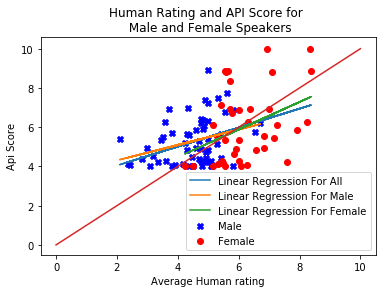

In [4]:
#Scatter plot male and female
plt.scatter(m_xs,m_ys,c='b', marker='X', label = 'Male')
plt.scatter(f_xs,f_ys,c='r', marker='o', label = 'Female')


#plotting regression line
plt.plot(xs, xreg_line, label = 'Linear Regression For All')
plt.plot(m_xs, mxreg_line, label = 'Linear Regression For Male')
plt.plot(f_xs, fxreg_line, label = 'Linear Regression For Female')

#diagonal line
plt.plot([0,10],[0,10])


#labels and legends
plt.xlabel("Average Human rating")
plt.ylabel("Api Score")
plt.legend(loc=4)
plt.title('Human Rating and API Score for \n Male and Female Speakers')

#Saving the plot
plt.savefig('../plots/graph.png', transparent=True, dpi=600)
plt.show()

In [5]:
#https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.pearsonr.html


pearsonrCoeff1, pValue = scipy.stats.pearsonr(xs, ys)
print (pearsonrCoeff1)

0.40593283423776855


In [6]:
pearsonrCoeff2, pValue = scipy.stats.pearsonr(m_xs, m_ys)
print (pearsonrCoeff2)

0.3164838340884611


In [7]:
pearsonrCoeff3, pValue = scipy.stats.pearsonr(f_xs, f_ys)
print (pearsonrCoeff3)

0.38102472109274627


/home/slobodan/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:52: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


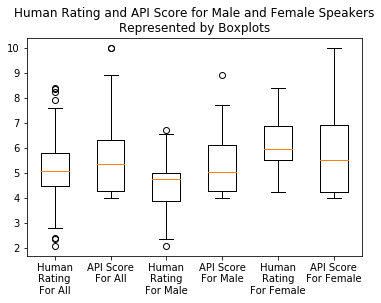

In [8]:
data = [xs,ys,m_xs,m_ys,f_xs,f_ys]
plt.title('Human Rating and API Score for Male and Female Speakers\nRepresented by Boxplots')
plt.boxplot(data)
plt.xticks([1, 2, 3, 4, 5, 6],
           ["Human\nRating\nFor All", "API Score\nFor All", "Human\nRating\nFor Male", "API Score\nFor Male", "Human\nRating\nFor Female", "API Score\nFor Female"])
plt.savefig('../plots/graph2.png', transparent=True, dpi=600,bbox_inches="tight")
plt.show()

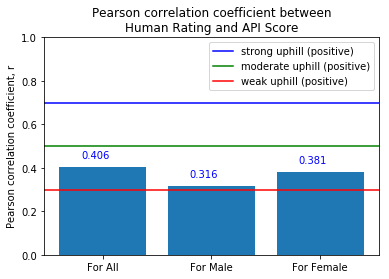

In [9]:
x=[1,2,3]
r = [round(pearsonrCoeff1,3), round(pearsonrCoeff2,3), round(pearsonrCoeff3,3)]
plt.bar(x,r)
plt.ylim(0,1)
plt.title("Pearson correlation coefficient between\nHuman Rating and API Score")

plt.axhline(.7,label='strong uphill (positive)',color='b')
plt.axhline(.5,label='moderate uphill (positive)',color='g')
plt.axhline(.3,label='weak uphill (positive)',color='r')

plt.ylabel("Pearson correlation coefficient, r")

for i, v in enumerate(r):
    plt.text(i+.8, v+.04, str(v), color='blue')

plt.legend()
plt.xticks([1, 2, 3],
           ["For All", "For Male", "For Female"])
plt.savefig('../plots/graph3.png', transparent=True, dpi=600,bbox_inches="tight")

plt.show()